![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [30]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [31]:
# Data Preprocessing

# Checking for missing values
missing_values = penguins_df.isnull().sum()

# Dropping rows with missing values
penguins_df_cleaned = penguins_df.dropna()

In [32]:
# Ensure the 'sex' column is in the DataFrame
if 'sex' in penguins_df_cleaned.columns:
    # Mapping 'MALE' to 1 and 'FEMALE' to 0
    penguins_df_cleaned['sex'] = penguins_df_cleaned['sex'].map({'MALE': 1, 'FEMALE': 0})
else:
    print("The 'sex' column is not present in the DataFrame.")

# Verify the mapping
penguins_df_cleaned.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [33]:
# Normalizing the data using Min-Max Scaling

# Selecting the features for normalization
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Initializing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fitting and transforming the features
penguins_df_normalized = penguins_df_cleaned.copy()
penguins_df_normalized[features] = scaler.fit_transform(penguins_df_cleaned[features])

# Display the first few rows of the normalized DataFrame
penguins_df_normalized.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.254545,0.666667,0.152542,0.291667,1
1,0.269091,0.511905,0.237288,0.305556,0
2,0.298182,0.583333,0.389831,0.152778,0
3,0.167273,0.738095,0.355932,0.208333,0
4,0.261818,0.892857,0.305085,0.263889,1


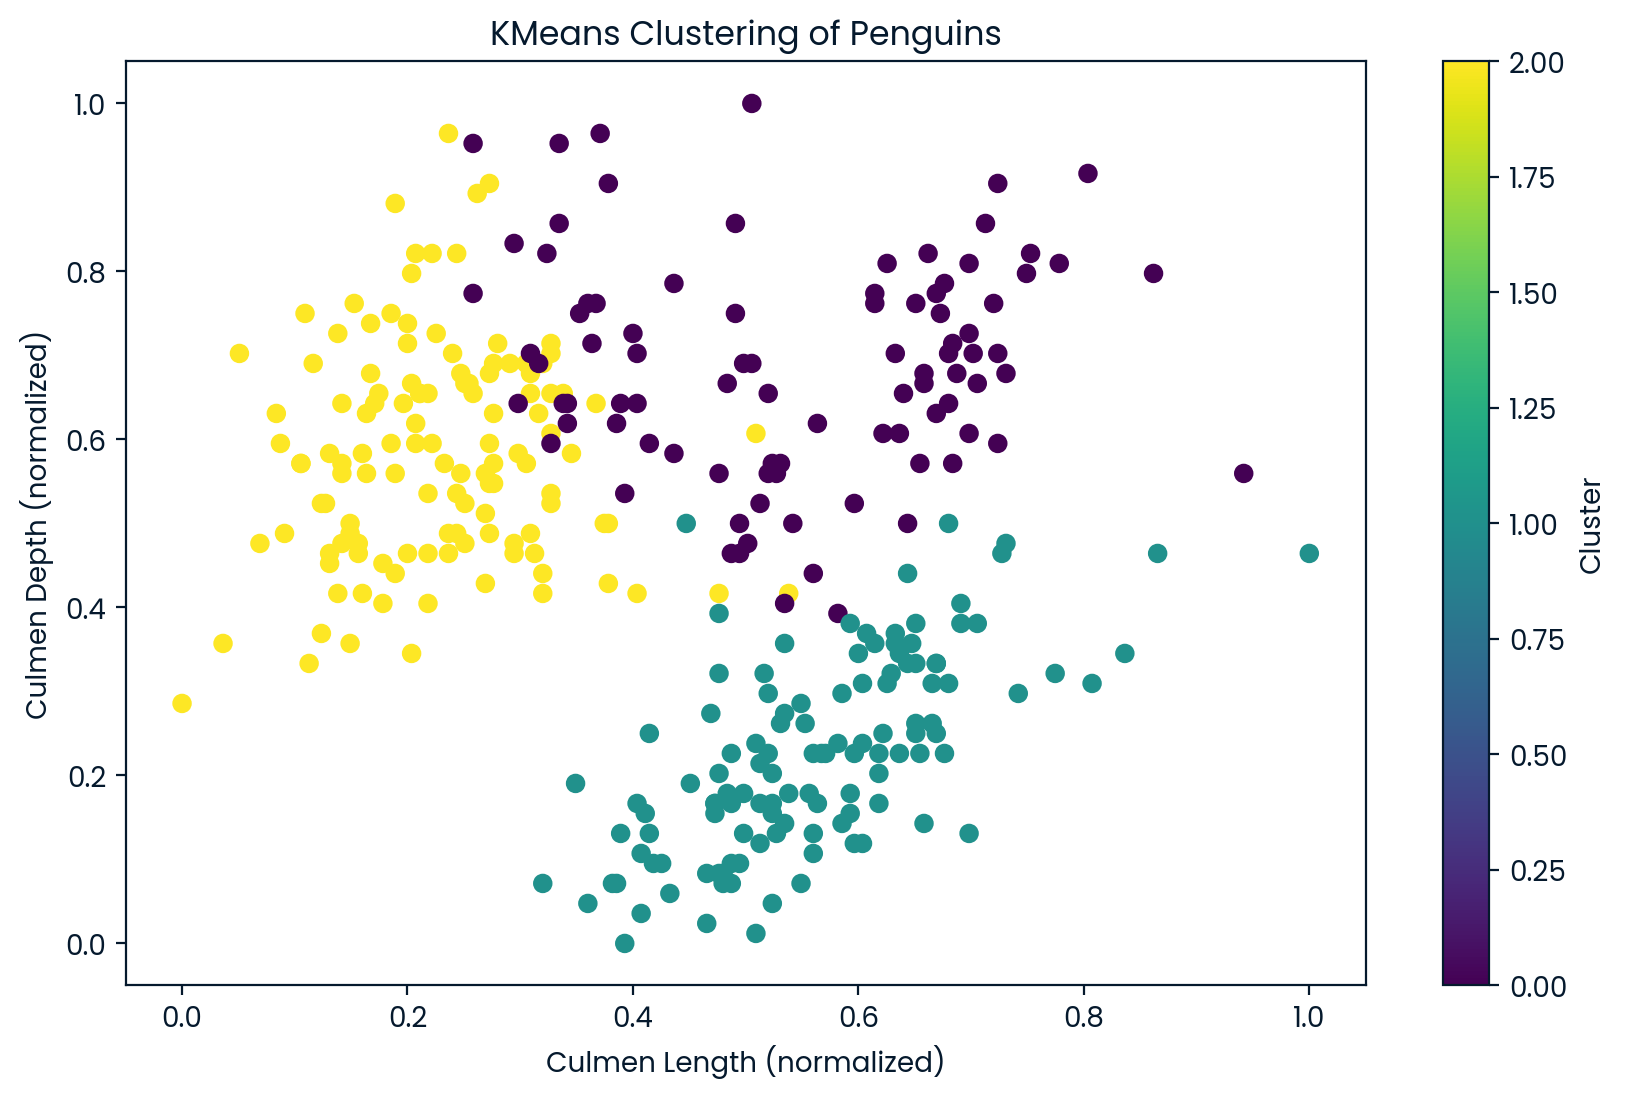

In [34]:
# KMeans Clustering

# Selecting the features for clustering
X = penguins_df_normalized[features]

# Initializing KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the model
kmeans.fit(X)

# Adding the cluster labels to the DataFrame
penguins_df_normalized['cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(penguins_df_normalized['culmen_length_mm'], penguins_df_normalized['culmen_depth_mm'], c=penguins_df_normalized['cluster'], cmap='viridis')
plt.xlabel('Culmen Length (normalized)')
plt.ylabel('Culmen Depth (normalized)')
plt.title('KMeans Clustering of Penguins')
plt.colorbar(label='Cluster')
plt.show()

In [35]:
# Creating a DataFrame to show the mean of the original variables by cluster

# Grouping by the cluster and calculating the mean of the original variables
stat_penguins = penguins_df_cleaned.copy()
stat_penguins['cluster'] = penguins_df_normalized['cluster']
stat_penguins = stat_penguins.groupby('cluster')[features].mean().reset_index()

# Display the resulting DataFrame
stat_penguins

,cluster,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,47.075556,18.862222,197.266667,3944.722222
1,1,47.568067,14.996639,217.235294,5092.436975
2,2,38.354472,17.988618,187.959350,3540.853659


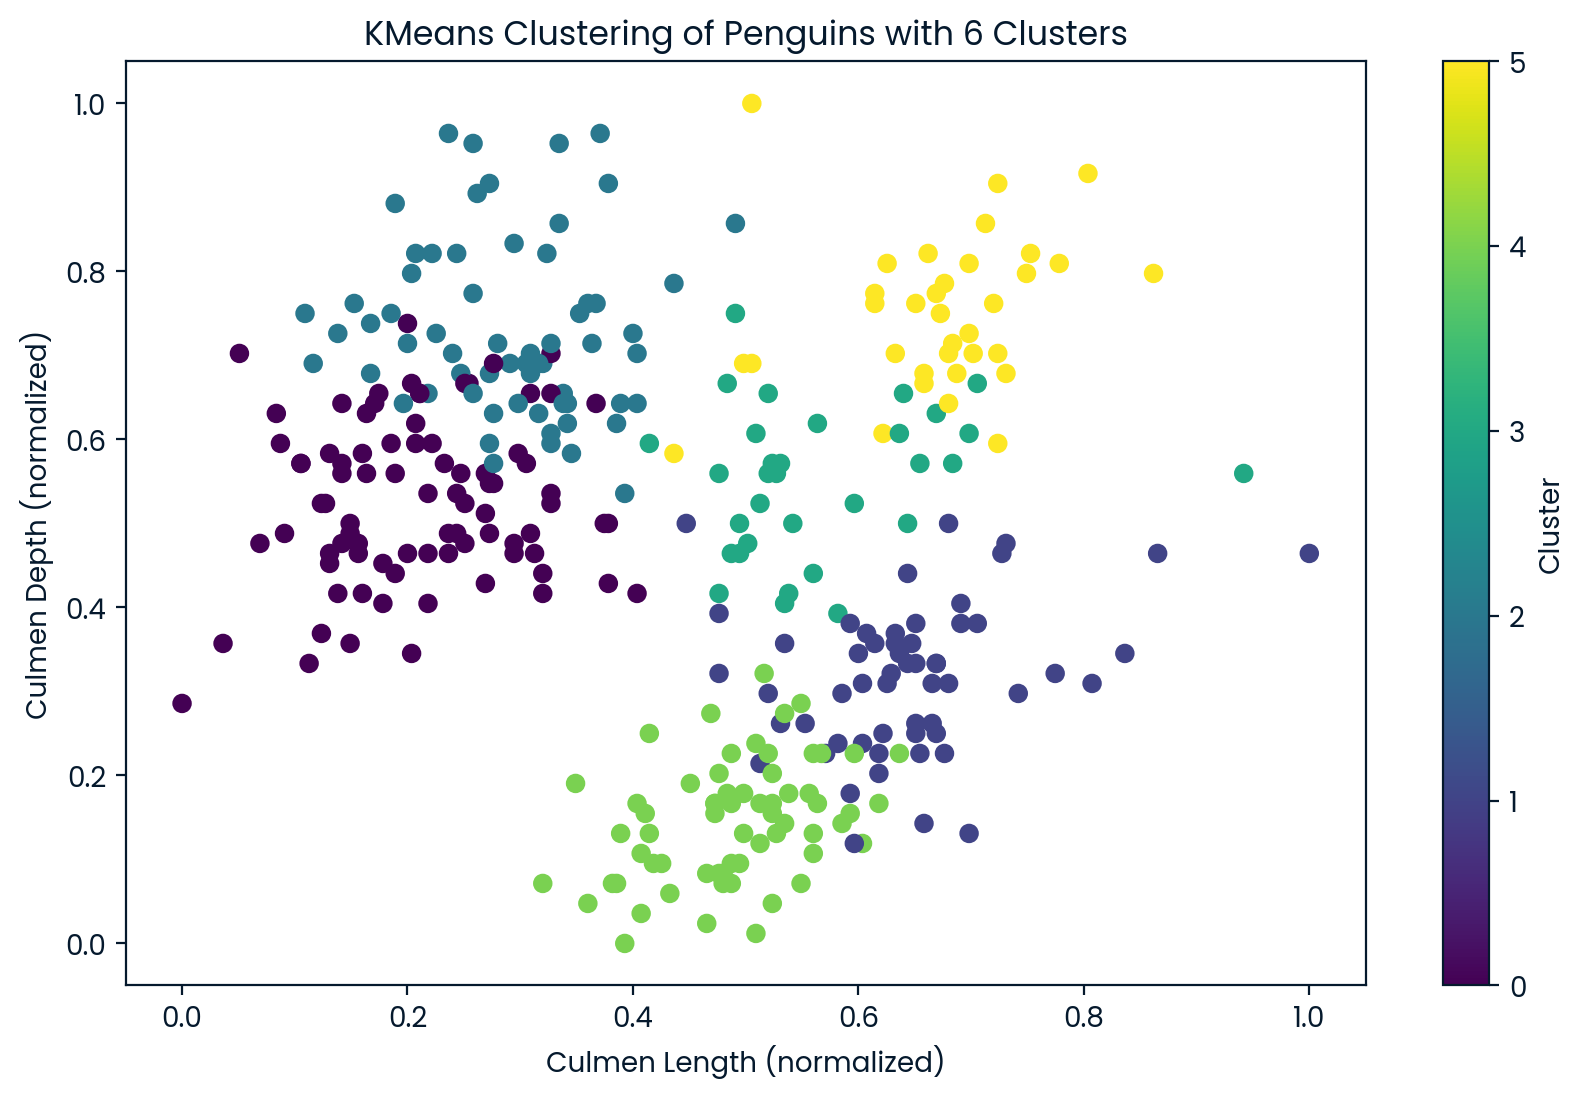

In [36]:
# KMeans Clustering with 6 clusters

# Initializing KMeans with 6 clusters
kmeans_6 = KMeans(n_clusters=6, random_state=42)

# Fitting the model
kmeans_6.fit(X)

# Adding the cluster labels to the DataFrame
penguins_df_normalized['cluster_6'] = kmeans_6.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(penguins_df_normalized['culmen_length_mm'], penguins_df_normalized['culmen_depth_mm'], c=penguins_df_normalized['cluster_6'], cmap='viridis')
plt.xlabel('Culmen Length (normalized)')
plt.ylabel('Culmen Depth (normalized)')
plt.title('KMeans Clustering of Penguins with 6 Clusters')
plt.colorbar(label='Cluster')
plt.show()